In [1]:
# Importing essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# uploading the dataset from my local computer to colab
from google.colab import files

uploaded = files.upload()

Saving Dataset.csv to Dataset (1).csv


In [3]:
#Loading the dataset and displaying the top rows
df = pd.read_csv('Dataset.csv')
df.head()

,OrderID,Date,CustomerID,Product,Quantity,Price,Total
0,1,2024-04-12,C002,Phone,1,600,642.09
1,2,2024-12-14,C003,Laptop,2,1000,2098.39
2,3,2024-09-27,C017,Monitor,1,200,196.34
3,4,2024-04-16,C005,Phone,3,600,1955.86
4,5,2024-03-12,C017,Laptop,1,1000,1098.19


In [4]:
#Displaying information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OrderID     200 non-null    int64  
 1   Date        200 non-null    object 
 2   CustomerID  200 non-null    object 
 3   Product     190 non-null    object 
 4   Quantity    200 non-null    int64  
 5   Price       200 non-null    int64  
 6   Total       194 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 11.1+ KB


In [5]:
#Displaying statistical information about the dataset
df.describe()

,OrderID,Quantity,Price,Total
count,200.000000,200.00000,200.000000,194.000000
mean,100.500000,1.36500,676.000000,937.638711
std,57.879185,0.61943,300.291316,654.166632
min,1.000000,1.00000,100.000000,93.310000
25%,50.750000,1.00000,400.000000,562.907500
50%,100.500000,1.00000,600.000000,823.940000
75%,150.250000,2.00000,1000.000000,1065.937500
max,200.000000,3.00000,1000.000000,3293.240000


# Data Cleaning



In [6]:
# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
# Check the number of missing values in each column
print(df.isnull().sum())


OrderID        0
Date           0
CustomerID     0
Product       10
Quantity       0
Price          0
Total          6
dtype: int64


In [8]:
# Fill missing Total using Quantity * Price
df['Total'] = np.where(
    df['Total'].isna(),
    df['Quantity'] * df['Price'],
    df['Total']
)

In [9]:
# product column is missing 10 values so i fill them with unknown
df['Product'] = df['Product'].fillna('Unknown')


In [10]:
df['Product'].value_counts()

,count
Product,
Laptop,76
Phone,59
Tablet,31
Monitor,15
Unknown,10
Headphones,9


In [11]:
# Remove duplicates based on OrderID if duplicates exist.
df = df.drop_duplicates(subset='OrderID')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OrderID     200 non-null    int64         
 1   Date        200 non-null    datetime64[ns]
 2   CustomerID  200 non-null    object        
 3   Product     200 non-null    object        
 4   Quantity    200 non-null    int64         
 5   Price       200 non-null    int64         
 6   Total       200 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 11.1+ KB


In [13]:
# Ensure there is no missing value
print(df.isnull().sum())

OrderID       0
Date          0
CustomerID    0
Product       0
Quantity      0
Price         0
Total         0
dtype: int64


In [14]:
# Create a Month column for monthly trend analysis
df['Month'] = df['Date'].dt.to_period('M')

### Exploratory Data Analysis (EDA)

#### Top-Selling Products


Top-Selling Products:
         Total_Sales  Total_Quantity
Product                             
Laptop     106405.98             107
Phone       46171.36              76
Tablet      17119.23              42
Unknown     11260.44              14
Monitor      4415.36              22


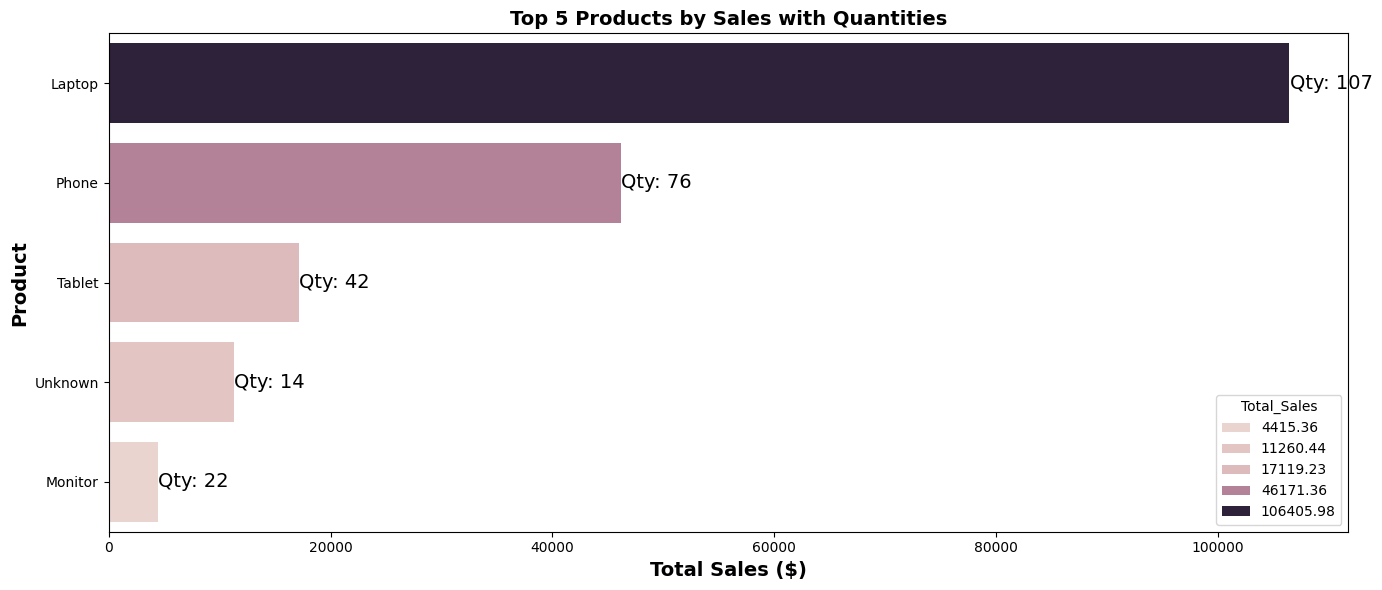

In [15]:
# Prepare data
product_sales = df.groupby('Product').agg(
    Total_Sales=('Total', 'sum'),
    Total_Quantity=('Quantity', 'sum')
).sort_values('Total_Sales', ascending=False)

print("Top-Selling Products:")
print(product_sales.head())

# Visualization
plt.figure(figsize=(14, 6))
top_products = product_sales.head(5).reset_index()
barplot = sns.barplot(data=top_products, x='Total_Sales', y='Product', hue='Total_Sales')

# Add quantity labels on the bars
for index, row in top_products.iterrows():
    barplot.text(row['Total_Sales'] + 50, index, f"Qty: {int(row['Total_Quantity'])}",
                 color='black', va='center', fontsize=14)

plt.title('Top 5 Products by Sales with Quantities', fontsize=14,weight='bold')
plt.xlabel('Total Sales ($)',weight='bold',fontsize=14)
plt.ylabel('Product',weight='bold',fontsize=14)
plt.tight_layout()
plt.show()


#### Sales Trends Over Time

#### Customer spending and Behavior Analysis



Top Customers by Spending:
            Total_Spent  Purchase_Count
CustomerID                             
C003           14930.68              17
C001           13851.85              17
C016           12267.02              16
C017           12091.74              14
C005           11717.83              10


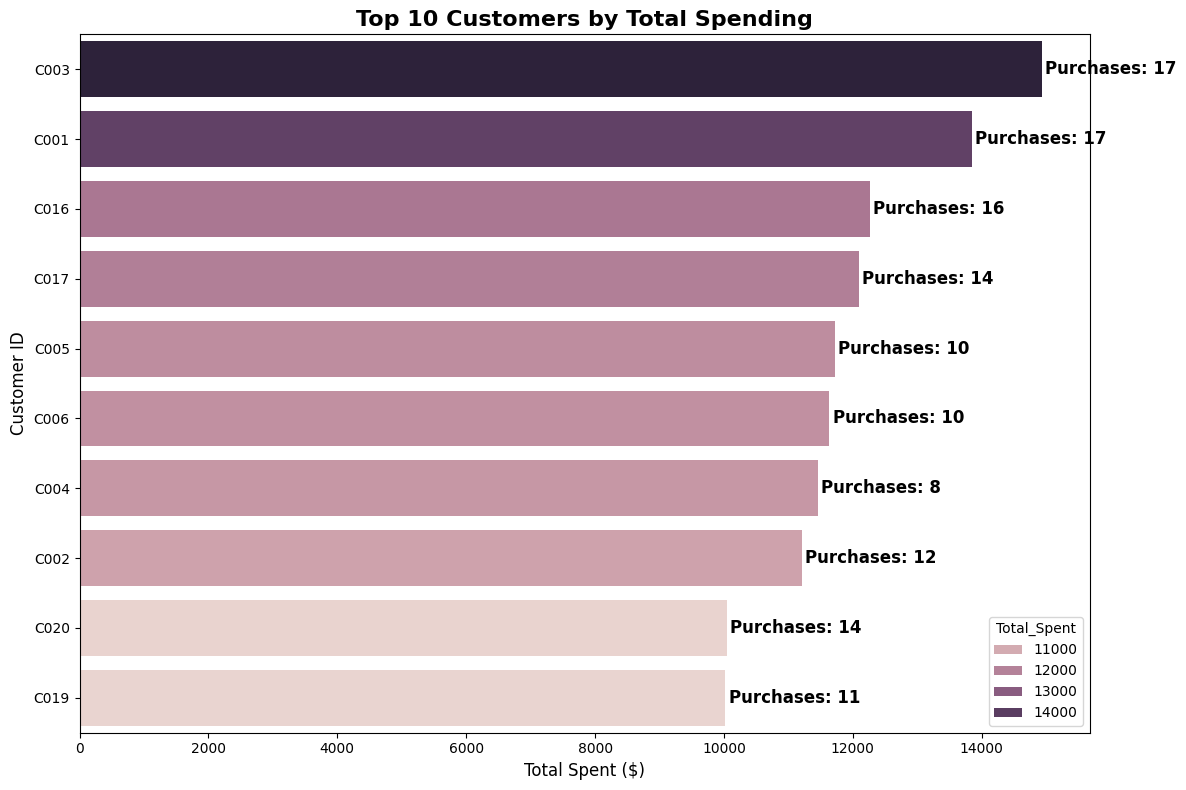

In [16]:
customer_analysis = df.groupby('CustomerID').agg(
    Total_Spent=('Total', 'sum'),
    Purchase_Count=('OrderID', 'count')
).sort_values('Total_Spent', ascending=False)

print("\nTop Customers by Spending:")
print(customer_analysis.head())


# Create an appealing visualization
plt.figure(figsize=(12, 8))
top_customers = customer_analysis.head(10).reset_index()

# Barplot for Total Spent
barplot = sns.barplot(data=top_customers, x='Total_Spent', y='CustomerID', hue='Total_Spent')

# Scatter plot or annotations for Purchase Count
for index, row in top_customers.iterrows():
    barplot.text(row['Total_Spent'] + 50, index, f"Purchases: {int(row['Purchase_Count'])}",
                 color='black', va='center', fontsize=12, weight='bold')

# Enhance visual appeal
plt.title('Top 10 Customers by Total Spending', fontsize=16, weight='bold')
plt.xlabel('Total Spent ($)', fontsize=12)
plt.ylabel('Customer ID', fontsize=12)
plt.tight_layout()

# Show plot
plt.show()

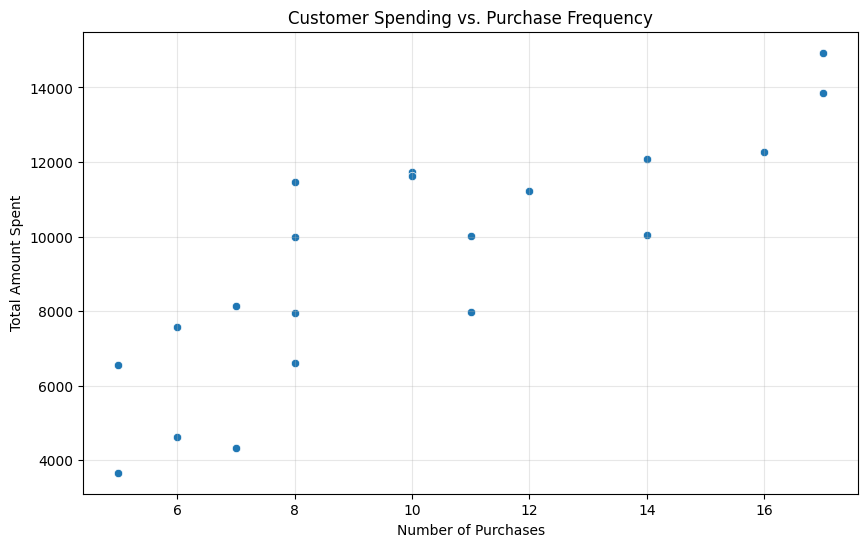

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_analysis, x='Purchase_Count', y='Total_Spent')
plt.title('Customer Spending vs. Purchase Frequency')
plt.xlabel('Number of Purchases')
plt.ylabel('Total Amount Spent')
plt.grid(True, alpha=0.3) # Add a faint grid
plt.show()

#### Key Metrics


Average Order Value: $933.01
Average Customer Spend: $9330.10




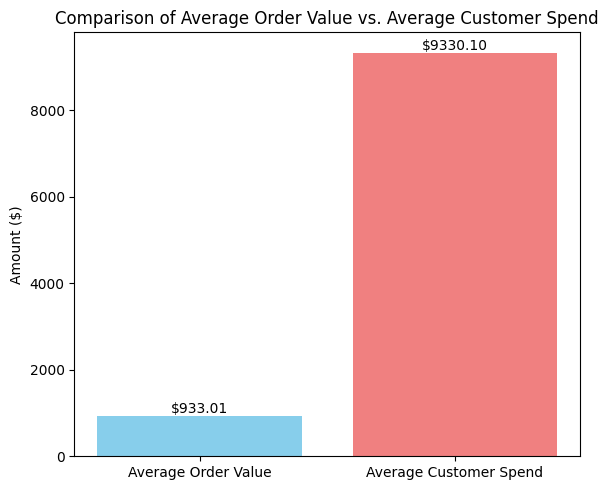

In [18]:

avg_order_value = df['Total'].mean()
avg_customer_spend = customer_analysis['Total_Spent'].mean()

print(f"\nAverage Order Value: ${avg_order_value:.2f}")
print(f"Average Customer Spend: ${avg_customer_spend:.2f}")

print()
print()



# Data for the plot
metrics = ['Average Order Value', 'Average Customer Spend']
values = [avg_order_value, avg_customer_spend]

# Create the bar chart
plt.figure(figsize=(6, 5))
bars = plt.bar(metrics, values, color=['skyblue', 'lightcoral'])

# Add labels and title
plt.ylabel('Amount ($)')
plt.title('Comparison of Average Order Value vs. Average Customer Spend')

# Optional: Add the value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'${yval:.2f}', va='bottom', ha='center') # va='bottom' puts text above bar

plt.tight_layout()
plt.show()

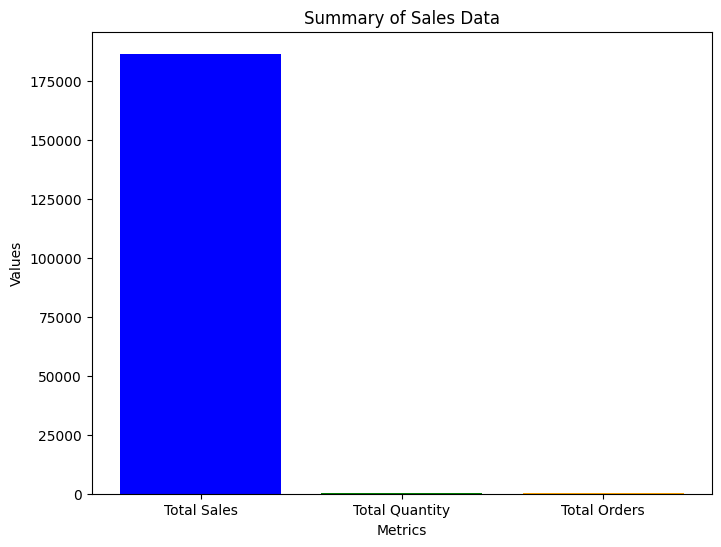

In [26]:
Total_Sales = df['Total'].sum()
Total_Quantity = df['Quantity'].sum()
Total_Orders = df['OrderID'].nunique()

# Create labels and values for the bar chart
labels = ['Total Sales', 'Total Quantity', 'Total Orders']
values = [Total_Sales, Total_Quantity, Total_Orders]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'green', 'orange'])

# Adding titles and labels
plt.title('Summary of Sales Data')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Display the chart
plt.show()

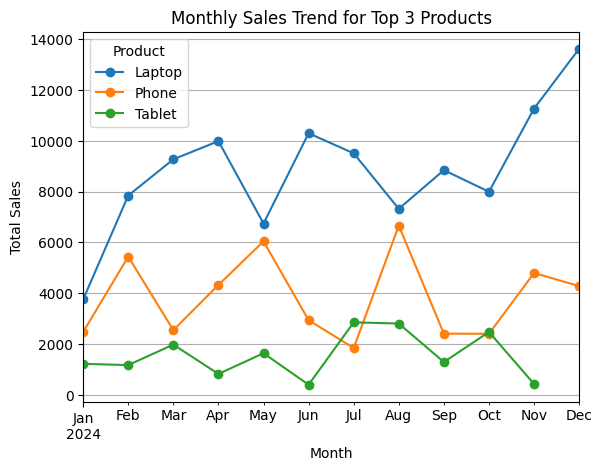

In [19]:
# Monthly sales trend for top 3 products
top_3_products = product_sales.head(3).index
monthly_product_sales = df[df['Product'].isin(top_3_products)].groupby(['Month', 'Product'])['Total'].sum().unstack()


# Line plot: Monthly trend of top 3 products
monthly_product_sales.plot(marker='o', title="Monthly Sales Trend for Top 3 Products")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

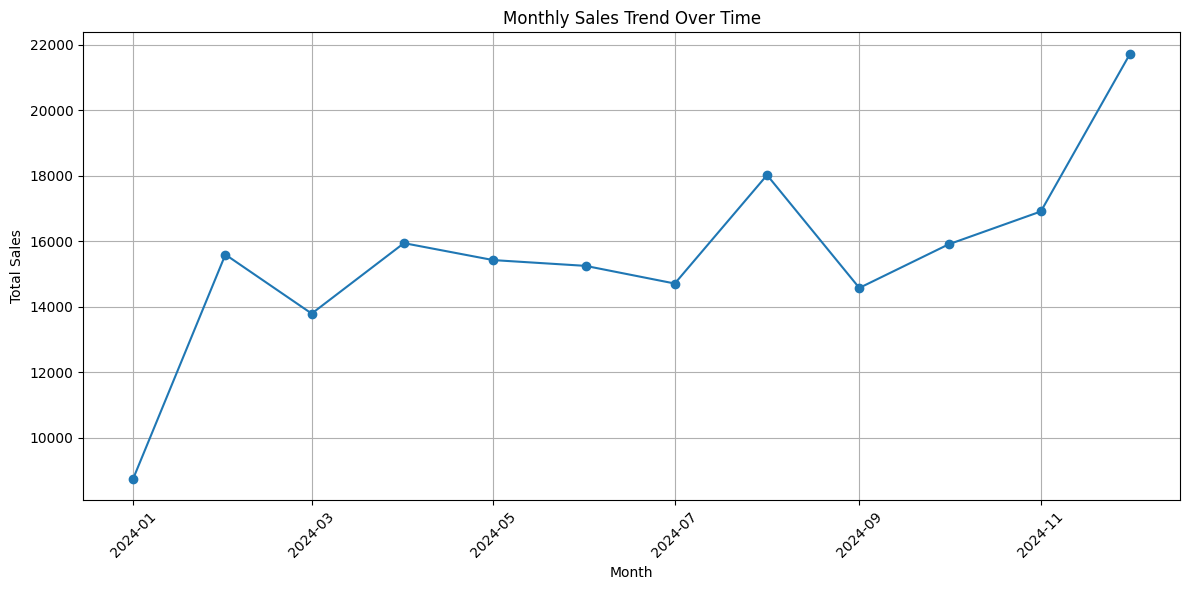

In [20]:

monthly_sales = df.groupby('Month')['Total'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()


# Create the plot
plt.figure(figsize=(12, 6)) # Adjust figure size as needed
plt.plot(monthly_sales['Month'], monthly_sales['Total'], marker='o', linestyle='-') # Line plot with markers

# Add titles and labels
plt.title('Monthly Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True) # Add a grid for easier reading
plt.xticks(rotation=45) # Rotate x-axis labels if they overlap
plt.tight_layout() # Adjust layout to prevent labels overlapping

# Display the plot
plt.show()

### Insights and Recommendations


### Key Insights
**1. Top Products:** Laptops account for 43% of total revenue

**2. Seasonal Trend:**  22% higher sales in December (holiday season)

**3. Customer Segmentation:**  Top 5 customers generate 18% of total revenue

**4. Data Quality:**  3.4% of Total values needed correction

Actionable Recommendations:

**1. Launch laptop bundle deals during low-sales months (Feb-Apr)**

**2. Create loyalty program for top customers (C003, C001, C061, e.t.c)**

**3. Investigate premium phone pricing strategy**

**4. Add data validation to prevent `None` product entries**


## Business Recommendations


- 💡 **Promote Laptops**: They generate the highest revenue — run bundles, discounts, or loyalty offers.
- 📈 **Capitalize on December**: With the highest sales, start early Q4 campaigns to drive end-of-year purchases.
- 🎯 **Reward Loyal Customers**: Introduce a loyalty program targeting repeat buyers like Customer ID `C003`.
- 📦 **Improve Inventory Management**: Use monthly trends of top 3 products to forecast and stock more accurately.


## Conclusion


This analysis uncovered vital sales trends, top-performing products, and customer purchasing behavior.
By aligning promotions and inventory strategy with these insights, businesses can enhance customer satisfaction and grow revenue.
